# Analysis of Top Charting Spotify Songs 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
#/kaggle/input/spotify-top-200-charts-20202021/spotify_dataset.csv

/kaggle/input/spotify-top-200-charts-20202021/spotify_dataset.csv


# Overview of Data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/spotify-top-200-charts-20202021/spotify_dataset.csv")
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [4]:
df.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

## Preprocessing Data

In [6]:
df[['Week of Highest Charting_start','Week of Highest Charting_end']] = df['Week of Highest Charting'].str.split('--', expand=True)

In [7]:
df['Week of Highest Charting_start'] = pd.to_datetime(df['Week of Highest Charting_start'], yearfirst=True)
df['Week of Highest Charting_end'] = pd.to_datetime(df['Week of Highest Charting_end'], yearfirst=True)
df['Streams'] = df['Streams'].replace(',','', regex=True)
df['Streams'] = df['Streams'].astype('int64')
df[['Artist','Chord']] = df[['Artist','Chord']].astype('category')
# Converting object columns to relevant float/int
object_cols = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence','Artist Followers','Popularity','Duration (ms)']
for each_col in object_cols:
    df[each_col] = pd.to_numeric(df[each_col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Index                           1556 non-null   int64         
 1   Highest Charting Position       1556 non-null   int64         
 2   Number of Times Charted         1556 non-null   int64         
 3   Week of Highest Charting        1556 non-null   object        
 4   Song Name                       1556 non-null   object        
 5   Streams                         1556 non-null   int64         
 6   Artist                          1556 non-null   category      
 7   Artist Followers                1545 non-null   float64       
 8   Song ID                         1556 non-null   object        
 9   Genre                           1556 non-null   object        
 10  Release Date                    1556 non-null   object        
 11  Week

In [8]:
#Taking the Log base 10 of Streams and Artist Followers
import numpy as np
df['logStreams'] = np.log10(df['Streams'])
df['logFollowers'] = np.log10(df['Artist Followers'])
#Taking negative log of Loudness to switch to more intuitive values
df['logloud'] = np.log10(-df['Loudness'])

#Replacing Duration Miliseconds with seconds so they are on a more standard range
df['Duration(s)'] = df['Duration (ms)']/1000

#Remove nulls as they all are important numerical variables like popularity and weeks charted
df = df.dropna()
#df.isnull().sum() 

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Exploratory Data Analysis

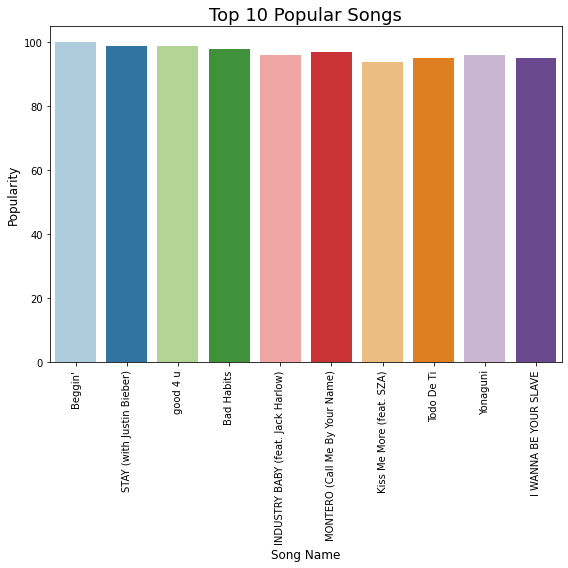

In [9]:
df.sort_values(by=['Popularity'])
df10 = df.head(10)
plt.figure(figsize=(8,8))
sns.barplot(x=df10['Song Name'],
            y=df10['Popularity'], 
            palette="Paired")
plt.xlabel("Song Name", size = 12)
plt.ylabel("Popularity", size = 12)
plt.title("Top 10 Popular Songs", size = 18)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [10]:
import plotly.express as px
fig = px.bar(df10, x='Song Name', y='Popularity')
fig.show()

In [11]:
df.sort_values(by=['Streams'])
df20 = df.head(20)
px.bar(df20,y='Streams',color='Song Name')

In [12]:
px.bar(df20,y='Streams',color='Genre')

In [13]:
Count_artists = len(df['Artist'].value_counts().to_list())
print("Number Of Unique Artists: ",Count_artists)

Number Of Unique Artists:  716


In [14]:
px.bar(df20,y='Streams',color='Artist')

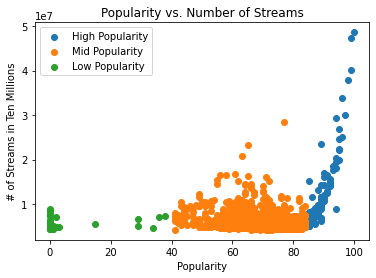

<Figure size 2000x2000 with 0 Axes>

High Popularity Correlation: 
             Popularity   Streams
Popularity    1.000000  0.900196
Streams       0.900196  1.000000
Mid Popularity Correlation: 
             Popularity   Streams
Popularity    1.000000 -0.306747
Streams      -0.306747  1.000000
Low Popularity Correlation: 
             Popularity  Streams
Popularity     1.00000  0.19786
Streams        0.19786  1.00000


In [15]:
#Exploration of Popularity vs. the Number of Streams
high_pop = df[df.Popularity >= 85]
mid_pop = df[(df.Popularity < 85) & (df.Popularity >= 40)]
low_pop = df[df.Popularity < 40]

plt.scatter(high_pop.Popularity, high_pop['Streams'], label = "High Popularity")
plt.scatter(mid_pop.Popularity, mid_pop['Streams'], label = "Mid Popularity")
plt.scatter(low_pop.Popularity, low_pop['Streams'], label = "Low Popularity")

plt.title("Popularity vs. Number of Streams")
plt.xlabel("Popularity")
plt.ylabel("# of Streams in Ten Millions")
plt.legend()
plt.figure(figsize = (10,10), dpi = 200)

plt.show()

print('\033[1m' + "High Popularity Correlation:" + '\033[0m', '\n', high_pop[["Popularity", "Streams"]].corr())
print('\033[1m' + "Mid Popularity Correlation:" + '\033[0m', '\n', mid_pop[["Popularity", "Streams"]].corr())
print('\033[1m' + "Low Popularity Correlation:" + '\033[0m', '\n', low_pop[["Popularity", "Streams"]].corr())

In [16]:
to_drop = ['Index', 'Song Name', 'Artist', 'Song ID', 'Genre', 'Weeks Charted']
df1 = df.drop(to_drop,axis=1)
df1.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist Followers,Release Date,Popularity,Danceability,Energy,Loudness,...,Tempo,Duration (ms),Valence,Chord,Week of Highest Charting_start,Week of Highest Charting_end,logStreams,logFollowers,logloud,Duration(s)
0,1,8,2021-07-23--2021-07-30,48633449,3377762.0,2017-12-08,100.0,0.714,0.800,-4.808,...,134.002,211560.0,0.589,B,2021-07-23,2021-07-30,7.686935,6.528629,0.681964,211.560
1,2,3,2021-07-23--2021-07-30,47248719,2230022.0,2021-07-09,99.0,0.591,0.764,-5.484,...,169.928,141806.0,0.478,C#/Db,2021-07-23,2021-07-30,7.674390,6.348309,0.739097,141.806
2,1,11,2021-06-25--2021-07-02,40162559,6266514.0,2021-05-21,99.0,0.563,0.664,-5.044,...,166.928,178147.0,0.688,A,2021-06-25,2021-07-02,7.603821,6.797026,0.702775,178.147
3,3,5,2021-07-02--2021-07-09,37799456,83293380.0,2021-06-25,98.0,0.808,0.897,-3.712,...,126.026,231041.0,0.591,B,2021-07-02,2021-07-09,7.577486,7.920610,0.569608,231.041
4,5,1,2021-07-23--2021-07-30,33948454,5473565.0,2021-07-23,96.0,0.736,0.704,-7.409,...,149.995,212000.0,0.894,D#/Eb,2021-07-23,2021-07-30,7.530820,6.738270,0.869760,212.000


In [17]:
org = [i for i in df1.columns]
cols = df1[org].select_dtypes(include=['float64']).columns
cols = [i for i in cols if i not in ['Chord']]
cols

['Artist Followers',
 'Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence',
 'logStreams',
 'logFollowers',
 'logloud',
 'Duration(s)']

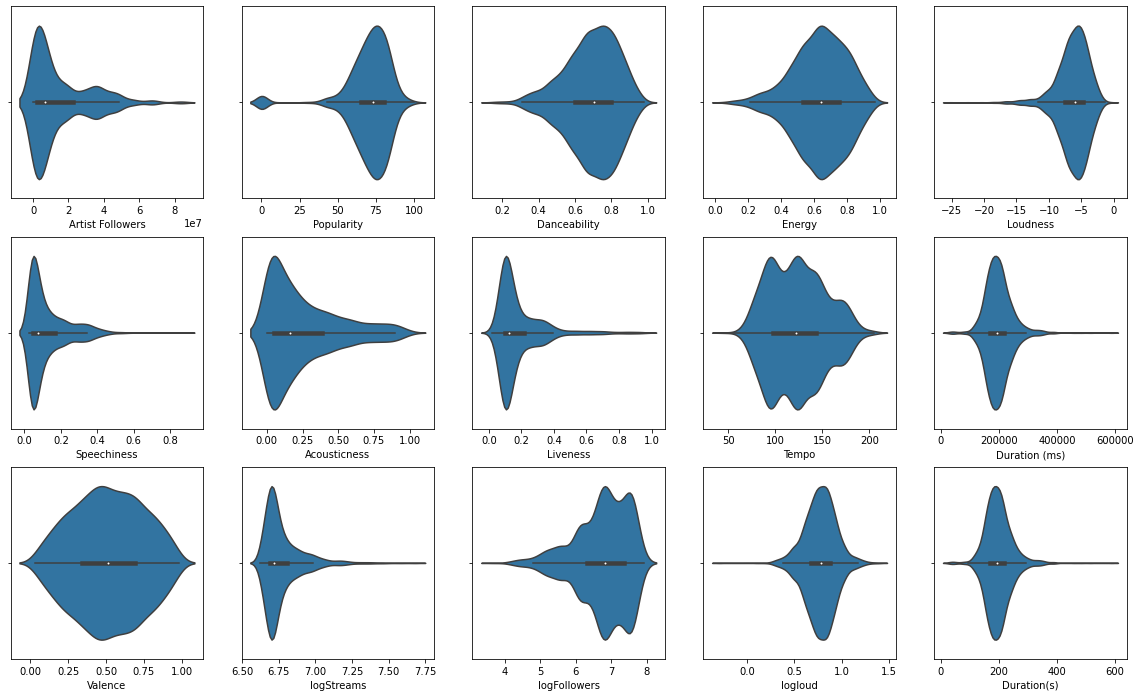

In [18]:
plt.figure(figsize=(20,12))
for i in enumerate(cols): 
    num = i[0]+1
    if num <= 15:
        plt.subplot(3,5,num)
        sns.violinplot(data=df1, x=i[1])
    else:
        continue
plt.show()

In [19]:
#to_drop = ['logStreams', 'Duration (ms)', 'Tempo', 'Loudness', 'Artist Followers', 'Release Date', 'Streams', 'Chord', 'Week of Highest Charting_start', 'Week of Highest Charting_end', 'logFollowers', 'Week of Highest Charting', 'Number of Times Charted', 'Highest Charting Position', 'Duration(s)']
dfdist = df1.drop(cols,axis=1)
dfdist.head(20)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Release Date,Chord,Week of Highest Charting_start,Week of Highest Charting_end
0,1,8,2021-07-23--2021-07-30,48633449,2017-12-08,B,2021-07-23,2021-07-30
1,2,3,2021-07-23--2021-07-30,47248719,2021-07-09,C#/Db,2021-07-23,2021-07-30
2,1,11,2021-06-25--2021-07-02,40162559,2021-05-21,A,2021-06-25,2021-07-02
3,3,5,2021-07-02--2021-07-09,37799456,2021-06-25,B,2021-07-02,2021-07-09
4,5,1,2021-07-23--2021-07-30,33948454,2021-07-23,D#/Eb,2021-07-23,2021-07-30
5,1,18,2021-05-07--2021-05-14,30071134,2021-03-31,G#/Ab,2021-05-07,2021-05-14
6,3,16,2021-05-14--2021-05-21,29356736,2021-04-09,G#/Ab,2021-05-14,2021-05-21
7,2,10,2021-06-18--2021-06-25,26951613,2021-05-20,D#/Eb,2021-06-18,2021-06-25
8,3,8,2021-06-18--2021-06-25,25030128,2021-06-04,C#/Db,2021-06-18,2021-06-25
9,8,10,2021-07-02--2021-07-09,24551591,2021-03-19,C#/Db,2021-07-02,2021-07-09


In [20]:
to_drop = ['logStreams', 'Duration (ms)', 'Tempo', 'Loudness', 'Artist Followers', 'Release Date', 'Streams', 'Chord', 'Week of Highest Charting_start', 'Week of Highest Charting_end', 'logFollowers', 'Week of Highest Charting', 'Number of Times Charted', 'Highest Charting Position', 'Duration(s)']
dfdist = df1.drop(to_drop,axis=1)
dfdist.head(20)

,Popularity,Danceability,Energy,Speechiness,Acousticness,Liveness,Valence,logloud
0,100.0,0.714,0.800,0.0504,0.12700,0.3590,0.5890,0.681964
1,99.0,0.591,0.764,0.0483,0.03830,0.1030,0.4780,0.739097
2,99.0,0.563,0.664,0.1540,0.33500,0.0849,0.6880,0.702775
3,98.0,0.808,0.897,0.0348,0.04690,0.3640,0.5910,0.569608
4,96.0,0.736,0.704,0.0615,0.02030,0.0501,0.8940,0.869760
5,97.0,0.610,0.508,0.1520,0.29700,0.3840,0.7580,0.824906
6,94.0,0.762,0.701,0.0286,0.23500,0.1230,0.7420,0.549126
7,95.0,0.780,0.718,0.0506,0.31000,0.0932,0.3420,0.556905
8,96.0,0.644,0.648,0.1180,0.27600,0.1350,0.4400,0.662852
9,95.0,0.750,0.608,0.0387,0.00165,0.1780,0.9580,0.602928


In [21]:
dfdist.sort_values(by=['Popularity'])
dfdist20 = dfdist.head(20)

In [22]:
to_drop = ['Popularity']
dfdist20 = dfdist20.drop(to_drop,axis=1)
dfdist20.head(20)

,Danceability,Energy,Speechiness,Acousticness,Liveness,Valence,logloud
0,0.714,0.800,0.0504,0.12700,0.3590,0.5890,0.681964
1,0.591,0.764,0.0483,0.03830,0.1030,0.4780,0.739097
2,0.563,0.664,0.1540,0.33500,0.0849,0.6880,0.702775
3,0.808,0.897,0.0348,0.04690,0.3640,0.5910,0.569608
4,0.736,0.704,0.0615,0.02030,0.0501,0.8940,0.869760
5,0.610,0.508,0.1520,0.29700,0.3840,0.7580,0.824906
6,0.762,0.701,0.0286,0.23500,0.1230,0.7420,0.549126
7,0.780,0.718,0.0506,0.31000,0.0932,0.3420,0.556905
8,0.644,0.648,0.1180,0.27600,0.1350,0.4400,0.662852
9,0.750,0.608,0.0387,0.00165,0.1780,0.9580,0.602928


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3

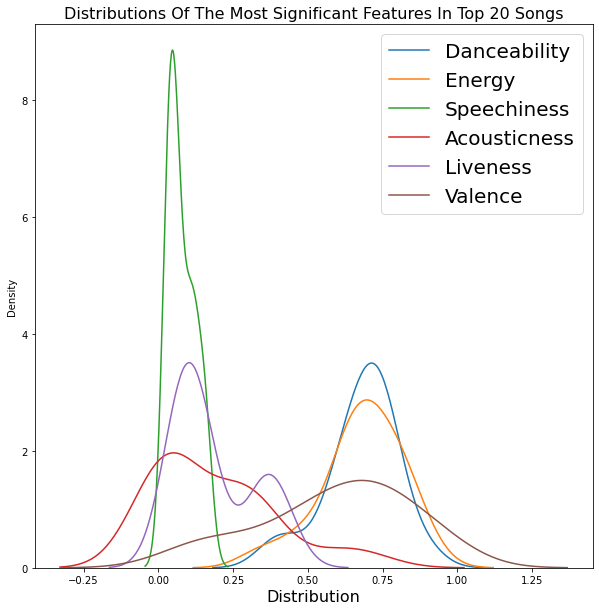

In [23]:
plt.figure(figsize=(10,10))
ax = sns.distplot(dfdist20['Danceability'],hist=False,label='Danceability')
ax = sns.distplot(dfdist20['Energy'],hist=False,label='Energy')
ax = sns.distplot(dfdist20['Speechiness'],hist=False,label='Speechiness')
ax = sns.distplot(dfdist20['Acousticness'],hist=False,label='Acousticness')                  
ax = sns.distplot(dfdist20['Liveness'],hist=False,label='Liveness')                  
ax = sns.distplot(dfdist20['Valence'],hist=False,label='Valence')                  
ax.set_xlabel('Distribution',fontsize=16)
ax.set_title('Distributions Of The Most Significant Features In Top 20 Songs',fontsize=16)
plt.legend(prop={'size':'20'})
plt.show()                

In [24]:
#import plotly.figure_factory as ff
#group_labels = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Liveness', 'Valence']
#colors = ['#333F44', '#37AA9C', '#94F3E4','#88F3E3','#77E5E4','#66E5E4']

# Create distplot with curve_type set to 'normal'
#fig = ff.create_distplot(dfdist20, group_labels, show_hist=False, colors=colors)

# Add title
#fig.update_layout(title_text='Popular Song Distribution Plot')
#fig.show()

### Scaling and Standardizing Data

In [25]:
import os

os.getcwd()

'/kaggle/working'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 ------------------------------------------------------

 'Artist Followers' had 'positive' skewness of 1.40

 Transformation yielded skewness of -0.11


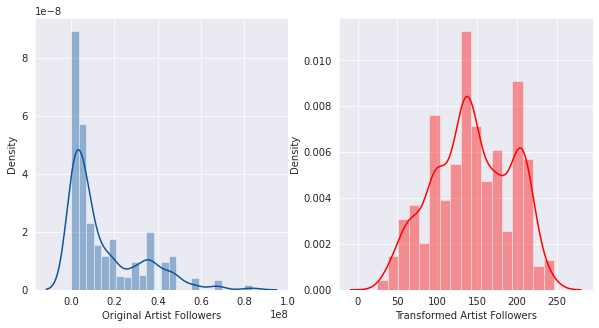

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 ------------------------------------------------------

 'Popularity' had 'negative' skewness of -2.47

 Transformation yielded skewness of -1.19


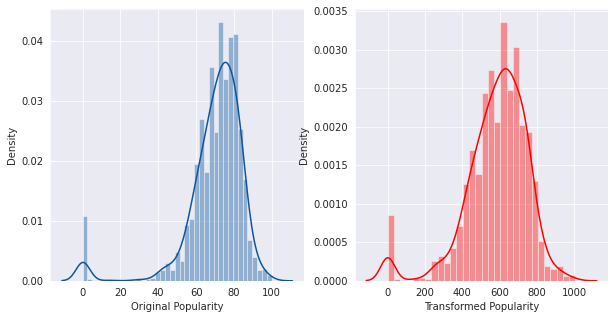


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Danceability' . Skewness = -0.60


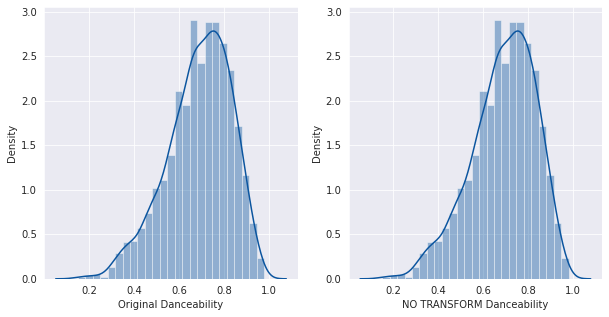


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Energy' . Skewness = -0.48


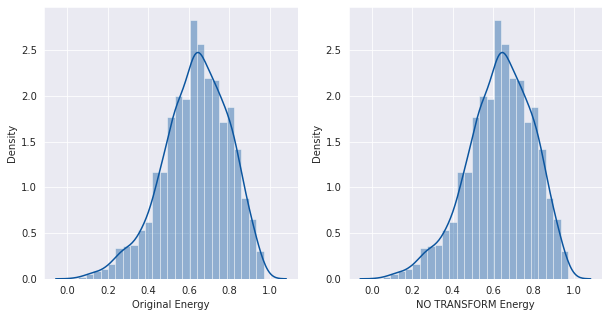

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 ------------------------------------------------------

 'Loudness' had 'negative' skewness of -1.60

 Transformation yielded skewness of -0.10


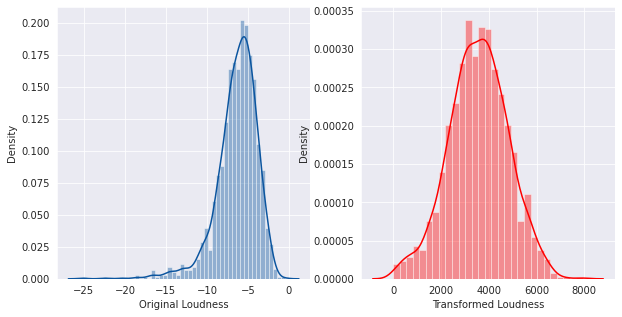

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 ------------------------------------------------------

 'Speechiness' had 'positive' skewness of 1.68

 Transformation yielded skewness of 0.10


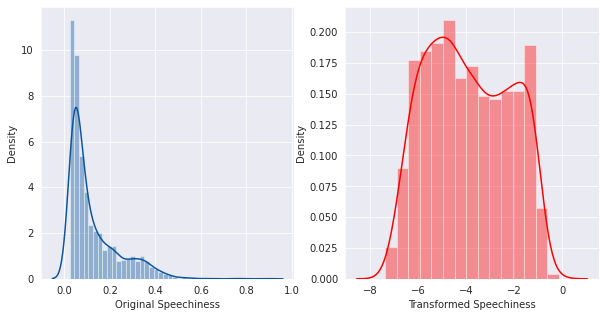

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 ------------------------------------------------------

 'Acousticness' had 'positive' skewness of 1.15

 Transformation yielded skewness of -0.13


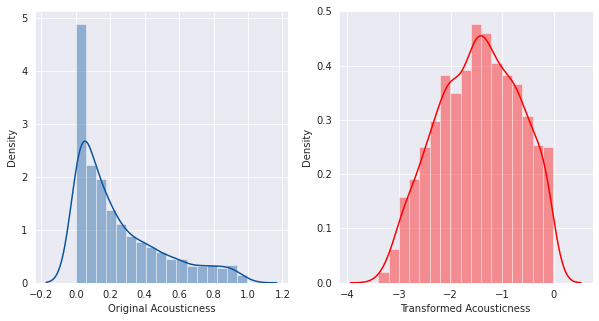

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 ------------------------------------------------------

 'Liveness' had 'positive' skewness of 2.41

 Transformation yielded skewness of 0.00


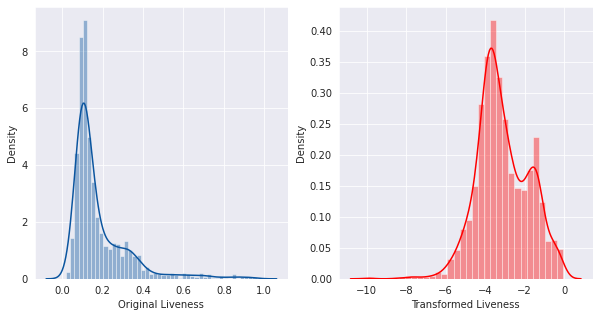


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Tempo' . Skewness = 0.29


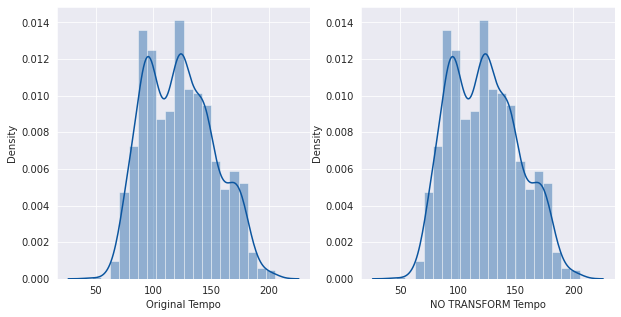

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 ------------------------------------------------------

 'Duration (ms)' had 'positive' skewness of 1.30

 Transformation yielded skewness of 0.18


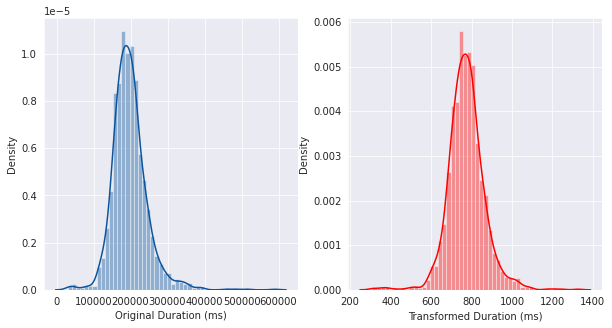


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Valence' . Skewness = -0.03


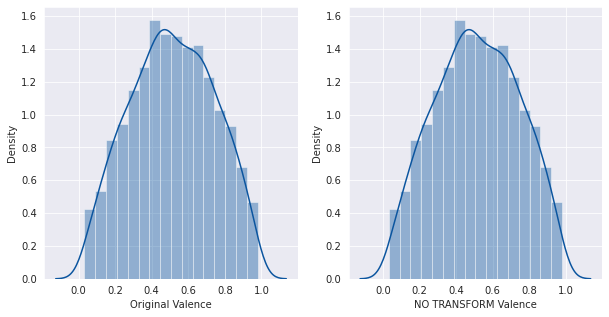

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 ------------------------------------------------------

 'logStreams' had 'positive' skewness of 2.40

 Transformation yielded skewness of 0.00


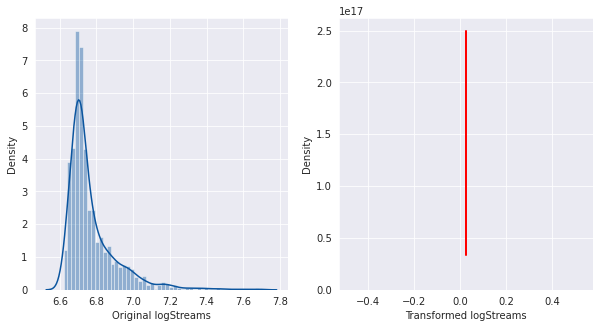


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'logFollowers' . Skewness = -0.91


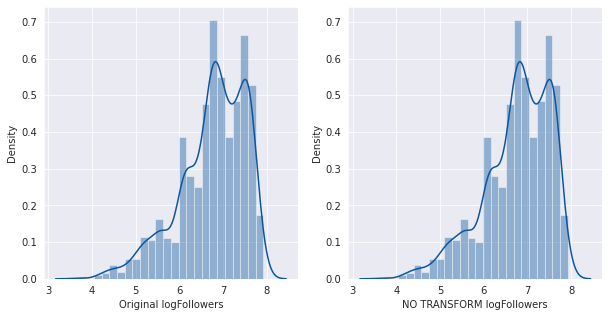


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'logloud' . Skewness = -0.27


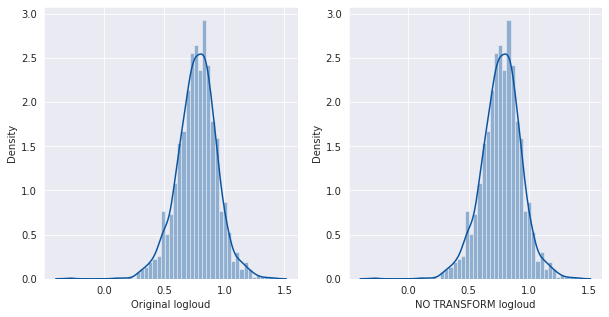

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




 ------------------------------------------------------

 'Duration(s)' had 'positive' skewness of 1.30

 Transformation yielded skewness of 0.18


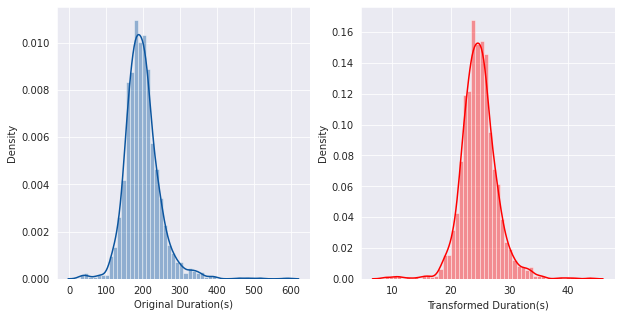

In [26]:
#Reduce Skew
import seaborn as sns
import numpy as np
import math
import scipy.stats as ss
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go throug desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1.set(xlabel='Original ' + col)
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2.set(xlabel='Transformed ' + col)
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2.set(xlabel='NO TRANSFORM ' + col)
                plt.show()
                

    return DF

#Using function
transformed_df = skew_autotransform(df[cols], include = None, exclude = None, plot = True, threshold = 1, exp = False)




In [27]:
df[cols] = transformed_df

In [28]:
transformed_df.head()

,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,logStreams,logFollowers,logloud,Duration(s)
0,119.460117,1005.914836,0.714,0.800,4337.646857,-5.055394,-1.569693,-1.277380,134.002,805.338850,0.589,0.024525,6.528629,0.681964,25.829536
1,108.639085,989.820590,0.591,0.764,3898.709435,-5.168842,-2.143468,-3.784689,169.928,662.346684,0.478,0.024525,6.348309,0.739097,20.891549
2,137.512053,989.820590,0.563,0.664,4180.765107,-2.576889,-0.942813,-4.302806,166.928,740.467440,0.688,0.024525,6.797026,0.702775,23.589314
3,246.382949,973.824225,0.808,0.897,5119.191021,-6.097458,-2.059444,-1.256258,126.026,840.746938,0.591,0.024525,7.920610,0.569608,27.052293
4,133.347878,942.126717,0.736,0.704,2816.472361,-4.545204,-2.378090,-5.948499,149.995,806.156612,0.894,0.024525,6.738270,0.869760,25.857776


In [29]:
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Tempo,Duration (ms),Valence,Chord,Week of Highest Charting_start,Week of Highest Charting_end,logStreams,logFollowers,logloud,Duration(s)
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,119.460117,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,134.002,805.338850,0.589,B,2021-07-23,2021-07-30,0.024525,6.528629,0.681964,25.829536
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,108.639085,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,169.928,662.346684,0.478,C#/Db,2021-07-23,2021-07-30,0.024525,6.348309,0.739097,20.891549
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,137.512053,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,166.928,740.467440,0.688,A,2021-06-25,2021-07-02,0.024525,6.797026,0.702775,23.589314
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,246.382949,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,126.026,840.746938,0.591,B,2021-07-02,2021-07-09,0.024525,7.920610,0.569608,27.052293
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,133.347878,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,149.995,806.156612,0.894,D#/Eb,2021-07-23,2021-07-30,0.024525,6.738270,0.869760,25.857776


In [30]:
transformed_df.head()

,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,logStreams,logFollowers,logloud,Duration(s)
0,119.460117,1005.914836,0.714,0.800,4337.646857,-5.055394,-1.569693,-1.277380,134.002,805.338850,0.589,0.024525,6.528629,0.681964,25.829536
1,108.639085,989.820590,0.591,0.764,3898.709435,-5.168842,-2.143468,-3.784689,169.928,662.346684,0.478,0.024525,6.348309,0.739097,20.891549
2,137.512053,989.820590,0.563,0.664,4180.765107,-2.576889,-0.942813,-4.302806,166.928,740.467440,0.688,0.024525,6.797026,0.702775,23.589314
3,246.382949,973.824225,0.808,0.897,5119.191021,-6.097458,-2.059444,-1.256258,126.026,840.746938,0.591,0.024525,7.920610,0.569608,27.052293
4,133.347878,942.126717,0.736,0.704,2816.472361,-4.545204,-2.378090,-5.948499,149.995,806.156612,0.894,0.024525,6.738270,0.869760,25.857776


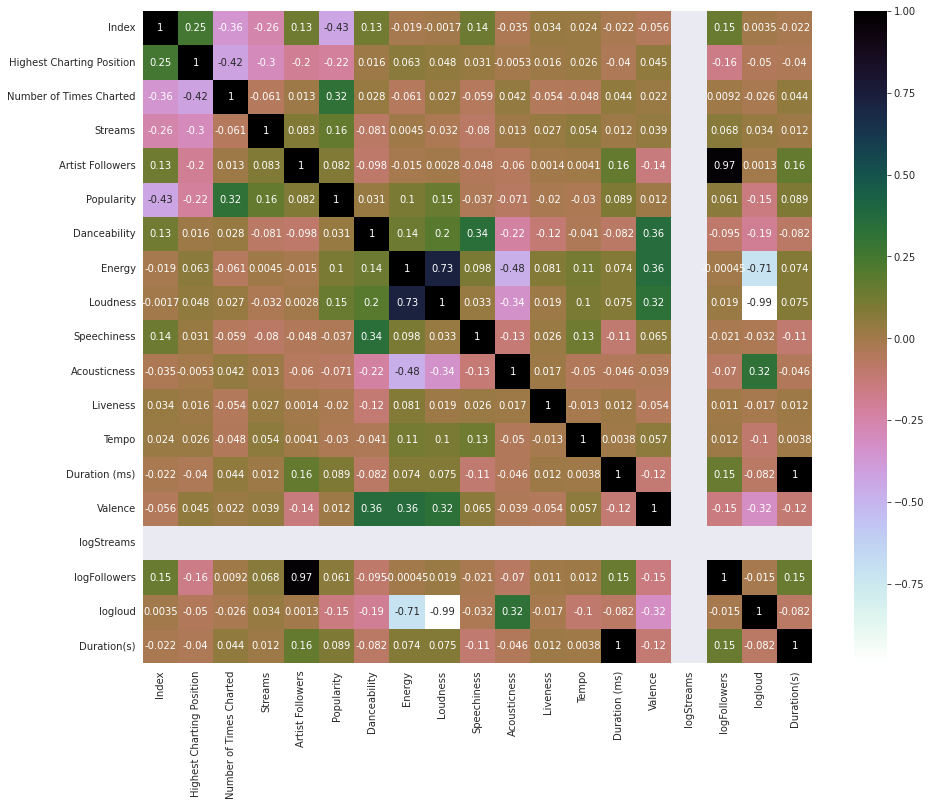

In [31]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

## Data Modelling

In [32]:
#Library for modelling
from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model
from sklearn.metrics import mean_absolute_error 
def RMSE(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [33]:
#Dropping the data columns 
#dropping non-log transformed variables
clean_df = df.drop(["Artist", "Song Name", "Release Date", "Song ID", "Week of Highest Charting_start", "Week of Highest Charting_end", "Weeks Charted", "Chord", "Index", "Duration (ms)", "Week of Highest Charting", "logStreams", "Artist Followers", "Loudness"], axis=1)
#Dropping log transformed variables
clean_df2 = df.drop(["Artist", "Song Name", "Release Date", "Song ID", "Week of Highest Charting_start", "Week of Highest Charting_end", "Weeks Charted", "Chord", "Index", "Duration (ms)", "Week of Highest Charting", "logStreams", "logFollowers", "logloud"], axis=1)
clean_df.head()

,Highest Charting Position,Number of Times Charted,Streams,Genre,Popularity,Danceability,Energy,Speechiness,Acousticness,Liveness,Tempo,Valence,logFollowers,logloud,Duration(s)
0,1,8,48633449,"['indie rock italiano', 'italian pop']",1005.914836,0.714,0.800,-5.055394,-1.569693,-1.277380,134.002,0.589,6.528629,0.681964,25.829536
1,2,3,47248719,['australian hip hop'],989.820590,0.591,0.764,-5.168842,-2.143468,-3.784689,169.928,0.478,6.348309,0.739097,20.891549
2,1,11,40162559,['pop'],989.820590,0.563,0.664,-2.576889,-0.942813,-4.302806,166.928,0.688,6.797026,0.702775,23.589314
3,3,5,37799456,"['pop', 'uk pop']",973.824225,0.808,0.897,-6.097458,-2.059444,-1.256258,126.026,0.591,7.920610,0.569608,27.052293
4,5,1,33948454,"['lgbtq+ hip hop', 'pop rap']",942.126717,0.736,0.704,-4.545204,-2.378090,-5.948499,149.995,0.894,6.738270,0.869760,25.857776


In [34]:
#Encoding Genre
genre_encoder = LabelEncoder()
clean_df['Genre'] = genre_encoder.fit_transform(clean_df['Genre'])
clean_df.head()

,Highest Charting Position,Number of Times Charted,Streams,Genre,Popularity,Danceability,Energy,Speechiness,Acousticness,Liveness,Tempo,Valence,logFollowers,logloud,Duration(s)
0,1,8,48633449,276,1005.914836,0.714,0.800,-5.055394,-1.569693,-1.277380,134.002,0.589,6.528629,0.681964,25.829536
1,2,3,47248719,63,989.820590,0.591,0.764,-5.168842,-2.143468,-3.784689,169.928,0.478,6.348309,0.739097,20.891549
2,1,11,40162559,364,989.820590,0.563,0.664,-2.576889,-0.942813,-4.302806,166.928,0.688,6.797026,0.702775,23.589314
3,3,5,37799456,363,973.824225,0.808,0.897,-6.097458,-2.059444,-1.256258,126.026,0.591,7.920610,0.569608,27.052293
4,5,1,33948454,312,942.126717,0.736,0.704,-4.545204,-2.378090,-5.948499,149.995,0.894,6.738270,0.869760,25.857776


In [35]:
train, test = train_test_split(clean_df, test_size=0.2, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 1235
No. of testing examples: 309


In [36]:
#Dropping Stream Column From Test data
y_test=test['Streams']
x_test=test.drop('Streams', axis=1)
x_test.head()

,Highest Charting Position,Number of Times Charted,Genre,Popularity,Danceability,Energy,Speechiness,Acousticness,Liveness,Tempo,Valence,logFollowers,logloud,Duration(s)
1501,113,1,187,443.021792,0.635,0.543,-4.335634,-2.073248,-1.727903,98.743,0.036,7.670383,0.773860,31.162946
1239,163,5,99,606.991841,0.464,0.547,-1.296917,-2.022415,-2.817035,67.003,0.423,6.583019,0.910464,26.459830
1015,169,1,246,443.021792,0.874,0.542,-1.276137,-1.934880,-2.490846,142.016,0.481,5.974226,0.849051,24.872991
667,22,2,360,516.290562,0.575,0.434,-6.429479,-0.295058,-3.735372,145.916,0.348,7.625597,0.913443,26.978477
1432,66,7,114,567.444832,0.866,0.438,-4.167282,-1.373903,-4.685437,129.039,0.695,4.916570,0.951483,26.570373


In [37]:
#Setting training data into x_train and y_train
x_train=train.drop('Streams',axis=1)
y_train=train['Streams']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape

((1235, 14), (1235,), (309, 14))

#### Modelling Code Blocks

In [38]:
#Linear Regression Modelling and Training
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
print(linear_model.score(x_train,y_train))

#testing the model and Displaying the output
linear_predict=linear_model.predict(x_test)
linear_result=pd.DataFrame({'Id':test.index,'Predicted Streams':linear_predict,'Actual Stream':y_test})
print(linear_result)

0.1778750440724789
        Id  Predicted Streams  Actual Stream
1501  1501       5.136992e+06        7115414
1239  1239       4.624326e+06        4394195
1015  1015       4.038447e+06        4803071
667    667       8.832312e+06        8115520
1432  1432       7.061963e+06        6554824
...    ...                ...            ...
338    338       7.559200e+06        7880155
736    736       8.540359e+06        8413330
867    867       6.384833e+06        6292620
1094  1094       5.542847e+06        4473413
238    238       7.540125e+06        5912293

[309 rows x 3 columns]


In [39]:
#Random Forest Regression
random_model=RandomForestRegressor(n_estimators=50)
random_model.fit(x_train,y_train)
print(random_model.score(x_train,y_train))

#Making predictions on test set 
random_predict=random_model.predict(x_test)

random_result=pd.DataFrame({'Id':test.index,'Predicted Streams':random_predict,'Actual Stream':y_test})
print(random_result)

0.9728023858334935
        Id  Predicted Streams  Actual Stream
1501  1501         6652829.94        7115414
1239  1239         5125626.92        4394195
1015  1015         5162318.54        4803071
667    667         6824586.64        8115520
1432  1432         4863184.32        6554824
...    ...                ...            ...
338    338         5731865.70        7880155
736    736         5885353.36        8413330
867    867         6427401.64        6292620
1094  1094         5349977.30        4473413
238    238         5390067.70        5912293

[309 rows x 3 columns]


In [40]:
from sklearn.linear_model import Lasso #Lasso regression model
from sklearn.linear_model import Ridge #Ridge Regression Model

In [41]:
#Building the model in Ridge Regression Model
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)
print(ridge_model.score(x_train,y_train))

#Testing the model
ridge_predict=ridge_model.predict(x_test)

#Creating dataframe to store ID with prediction
ridge_result=pd.DataFrame({'Id':test.index,'Predicted Streams':ridge_predict,'Actual Stream':y_test})
print(ridge_result)

0.17785234221016322
        Id  Predicted Streams  Actual Stream
1501  1501       5.160211e+06        7115414
1239  1239       4.592619e+06        4394195
1015  1015       4.048713e+06        4803071
667    667       8.837798e+06        8115520
1432  1432       7.061811e+06        6554824
...    ...                ...            ...
338    338       7.591658e+06        7880155
736    736       8.532752e+06        8413330
867    867       6.363247e+06        6292620
1094  1094       5.551527e+06        4473413
238    238       7.545078e+06        5912293

[309 rows x 3 columns]


In [42]:
#Building the model in Lasso Regression Model 
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(x_train,y_train)
print(lasso_model.score(x_train,y_train))

#Testing the model
lasso_predict=lasso_model.predict(x_test)

#Creating dataframe to store ID with prediction
lasso_result=pd.DataFrame({'Id':test.index,'Predicted Streams':lasso_predict,'Actual Stream':y_test})
print(lasso_result)

0.17787504404413534
        Id  Predicted Streams  Actual Stream
1501  1501       5.137016e+06        7115414
1239  1239       4.624303e+06        4394195
1015  1015       4.038464e+06        4803071
667    667       8.832320e+06        8115520
1432  1432       7.061974e+06        6554824
...    ...                ...            ...
338    338       7.559231e+06        7880155
736    736       8.540359e+06        8413330
867    867       6.384813e+06        6292620
1094  1094       5.542862e+06        4473413
238    238       7.540130e+06        5912293

[309 rows x 3 columns]


#### Evaluation of Model Results

In [43]:
#View accuracy of each model on training
print('Lasso Model Accuracy: ', lasso_model.score(x_train,y_train))
print('Ridge Model Accuracy: ', ridge_model.score(x_train,y_train))
print('Random Forest Model Accuracy: ', random_model.score(x_train,y_train))
print('Linear Regression Model Accuracy: ', linear_model.score(x_train,y_train))

Lasso Model Accuracy:  0.17787504404413534
Ridge Model Accuracy:  0.17785234221016322
Random Forest Model Accuracy:  0.9728023858334935
Linear Regression Model Accuracy:  0.1778750440724789


In [44]:
import plotly.graph_objs as go
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Accuracy Score<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=10),
    cells=dict(values=[['<b>Random Forest<b>', '<b>Linear Regression<b>','<b>Lasso<b>','<b>Ridge<b>'],
                                    [np.round(random_model.score(x_train,y_train).mean(),4), 
                                     np.round(linear_model.score(x_train,y_train).mean(),4),
                                     np.round(lasso_model.score(x_train,y_train),4),
                                     np.round(ridge_model.score(x_train,y_train).mean(),4) 
                                    ]]))
                     ])
fig.update_layout(title='Model Results')
fig.show()

In [45]:
#View the performance accuracy of test data
print('Lasso Model Accuracy: ', lasso_model.score(x_test,y_test))
print('Ridge Model Accuracy: ', ridge_model.score(x_test,y_test))
print('Random Forest Model Accuracy: ', random_model.score(x_test,y_test))
print('Linear Regression Model Accuracy: ', linear_model.score(x_test,y_test))

Lasso Model Accuracy:  0.13082904323144462
Ridge Model Accuracy:  0.13058974281919167
Random Forest Model Accuracy:  0.8402650190721264
Linear Regression Model Accuracy:  0.1308291945071679


In [46]:
#Random Forest Feature Importance:
sorted_features = np.sort(random_model.feature_importances_)[::-1]

for i, item in enumerate(sorted_features):
      # Use i and item to print out the feature importance of each column
    print("{0:s}: {1:.2f}".format(x_train.columns[i], item))

Highest Charting Position: 0.69
Number of Times Charted: 0.16
Genre: 0.04
Popularity: 0.02
Danceability: 0.01
Energy: 0.01
Speechiness: 0.01
Acousticness: 0.01
Liveness: 0.01
Tempo: 0.01
Valence: 0.01
logFollowers: 0.01
logloud: 0.01
Duration(s): 0.00


In [47]:
##ROC Curves
#from sklearn import metrics
#
#y_pred_proba = random_model.predict(test)[:1]
#fpr, tpr, _ = metrics.roc_curve(test_stream,  y_pred_proba)

#create ROC curve
#plt.plot(fpr,tpr)
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()



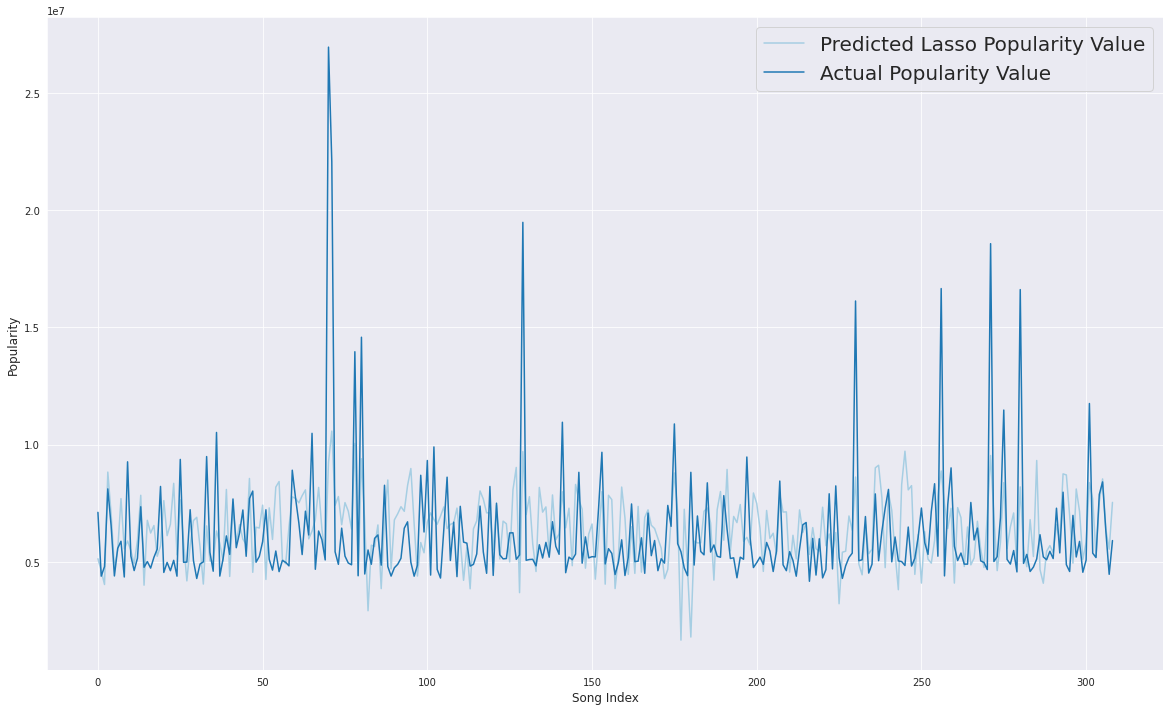

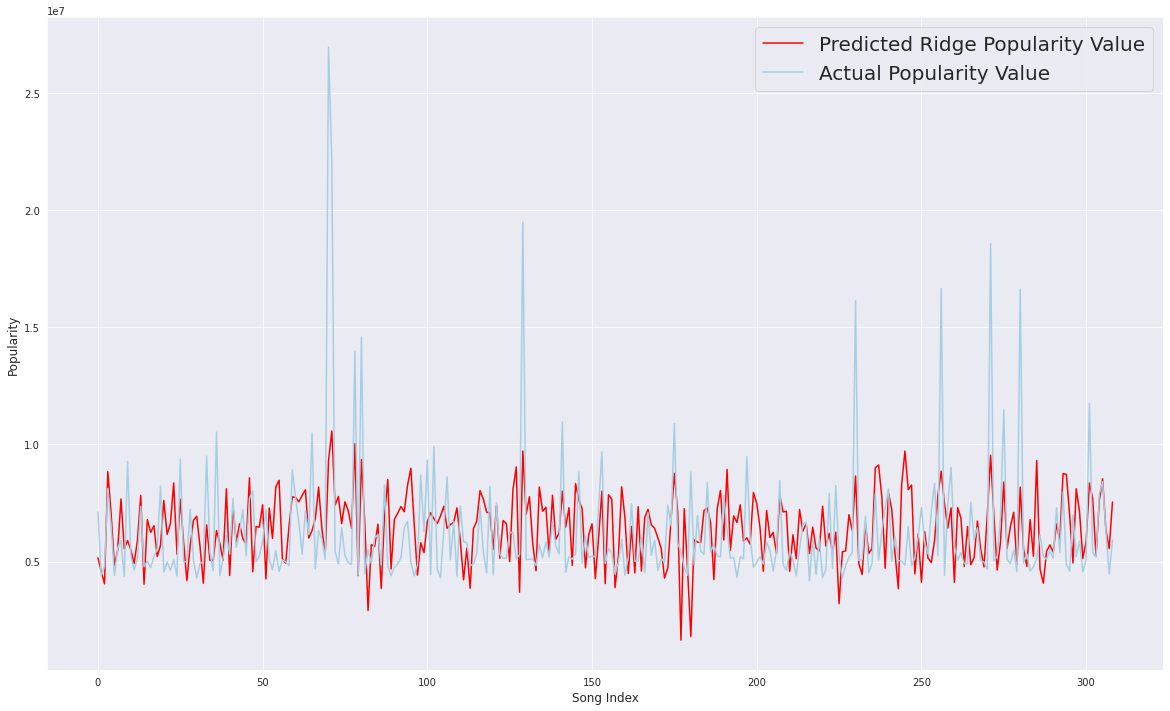

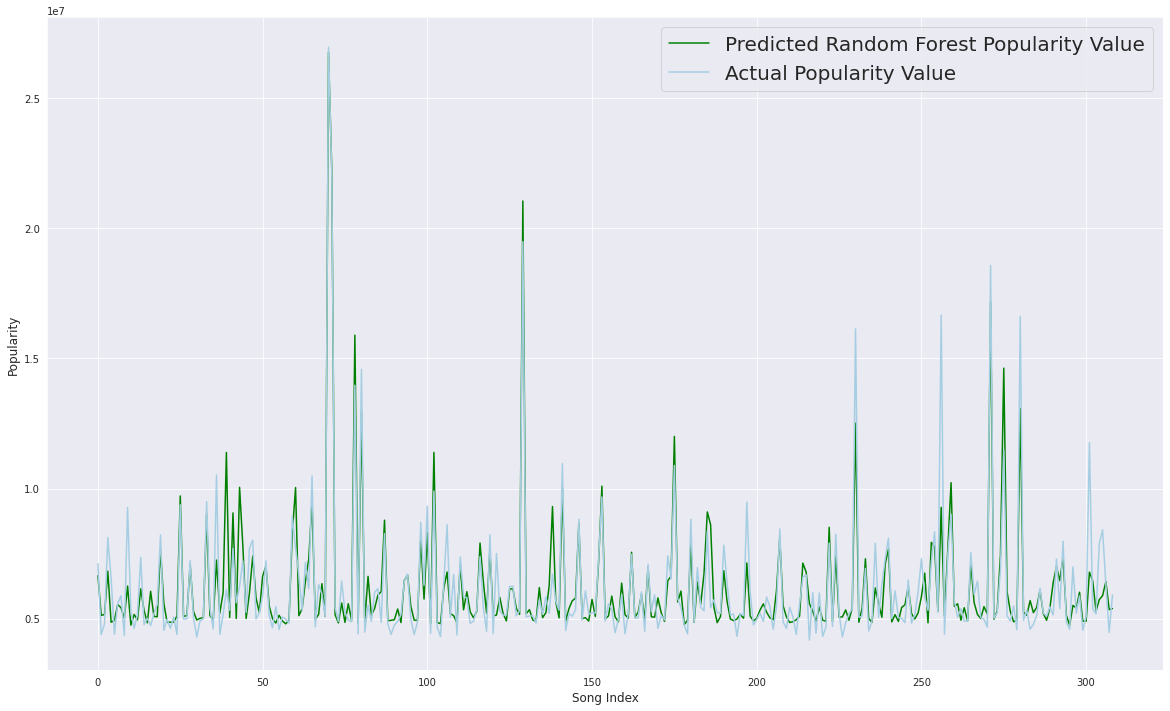

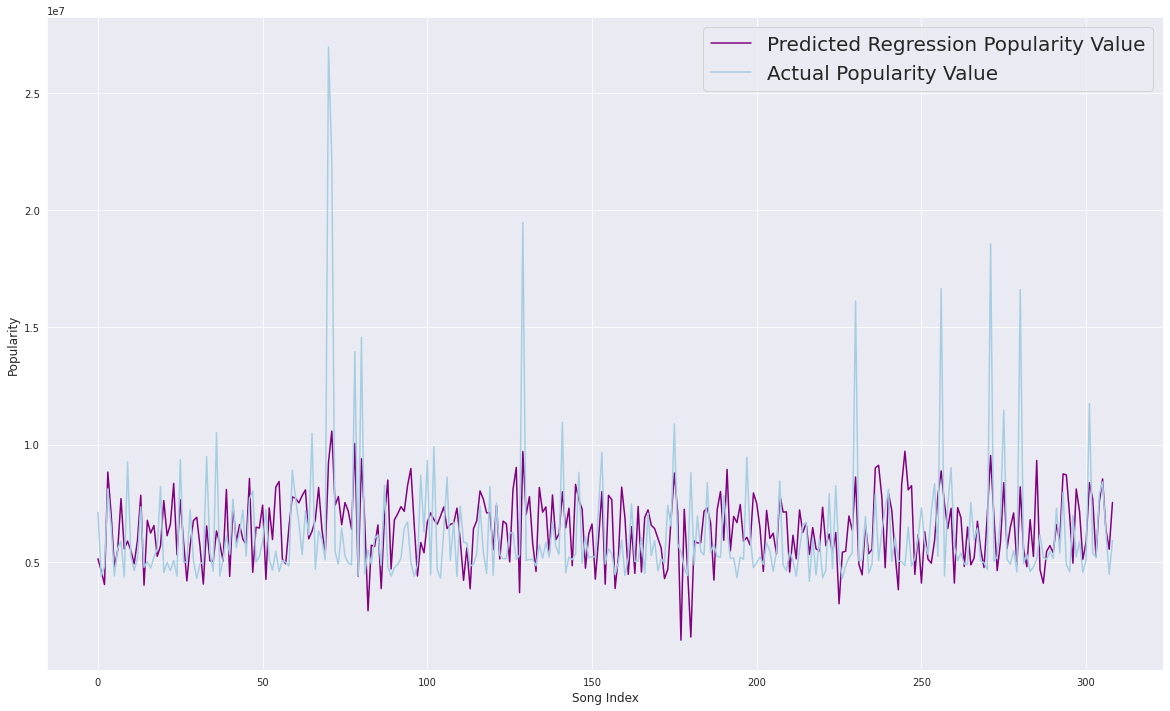

In [48]:
plt.figure(figsize=(20,12))
ax=sns.lineplot(x=np.arange(0,len(lasso_predict)),y=lasso_predict,label = 'Predicted Lasso Popularity Value')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Popularity Value')
ax.set_xlabel('Song Index',fontsize=12)
ax.set_ylabel('Popularity',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
#ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=27,
        #verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})
plt.show()

plt.figure(figsize=(20,12))
ax=sns.lineplot(x=np.arange(0,len(ridge_predict)),y=ridge_predict,label = 'Predicted Ridge Popularity Value', color='red')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Popularity Value')
ax.set_xlabel('Song Index',fontsize=12)
ax.set_ylabel('Popularity',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='red',alpha=0.5)
#ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=27,
        #verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})
plt.show()

plt.figure(figsize=(20,12))
ax=sns.lineplot(x=np.arange(0,len(random_predict)),y=random_predict,label = 'Predicted Random Forest Popularity Value',color='green')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Popularity Value')
ax.set_xlabel('Song Index',fontsize=12)
ax.set_ylabel('Popularity',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='green',alpha=0.5)
#ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=27,
        #verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})
plt.show()

plt.figure(figsize=(20,12))
ax=sns.lineplot(x=np.arange(0,len(linear_predict)),y=linear_predict,label = 'Predicted Regression Popularity Value', color='purple')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Popularity Value')
ax.set_xlabel('Song Index',fontsize=12)
ax.set_ylabel('Popularity',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='purple',alpha=0.5)
#ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=27,
        #verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})
plt.show()